In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
import uuid
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import math
import sklearn.metrics as metrics

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output
print(check_output(["ls", "../input"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

# DataSet Read
df = pd.read_csv("../input/MiningProcess_Flotation_Plant_Database.csv",decimal=",")
# Delete date column
df= df.drop(df.columns[[0]], axis=1)
df.head()

MiningProcess_Flotation_Plant_Database.csv



,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,250.576,...,250.884,457.396,432.962,424.954,443.558,502.255,446.370,523.344,66.91,1.31
1,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,250.862,...,248.994,451.891,429.560,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,55.2,16.98,3043.46,568.054,399.668,10.0680,1.74,249.741,247.874,250.313,...,248.071,451.240,468.927,434.610,449.688,484.411,447.826,458.567,66.91,1.31
3,55.2,16.98,3047.36,568.665,397.939,10.0689,1.74,249.917,254.487,250.049,...,251.147,452.441,458.165,442.865,446.210,471.411,437.690,427.669,66.91,1.31
4,55.2,16.98,3033.69,558.167,400.254,10.0697,1.74,250.203,252.136,249.895,...,248.928,452.441,452.900,450.523,453.670,462.598,443.682,425.679,66.91,1.31


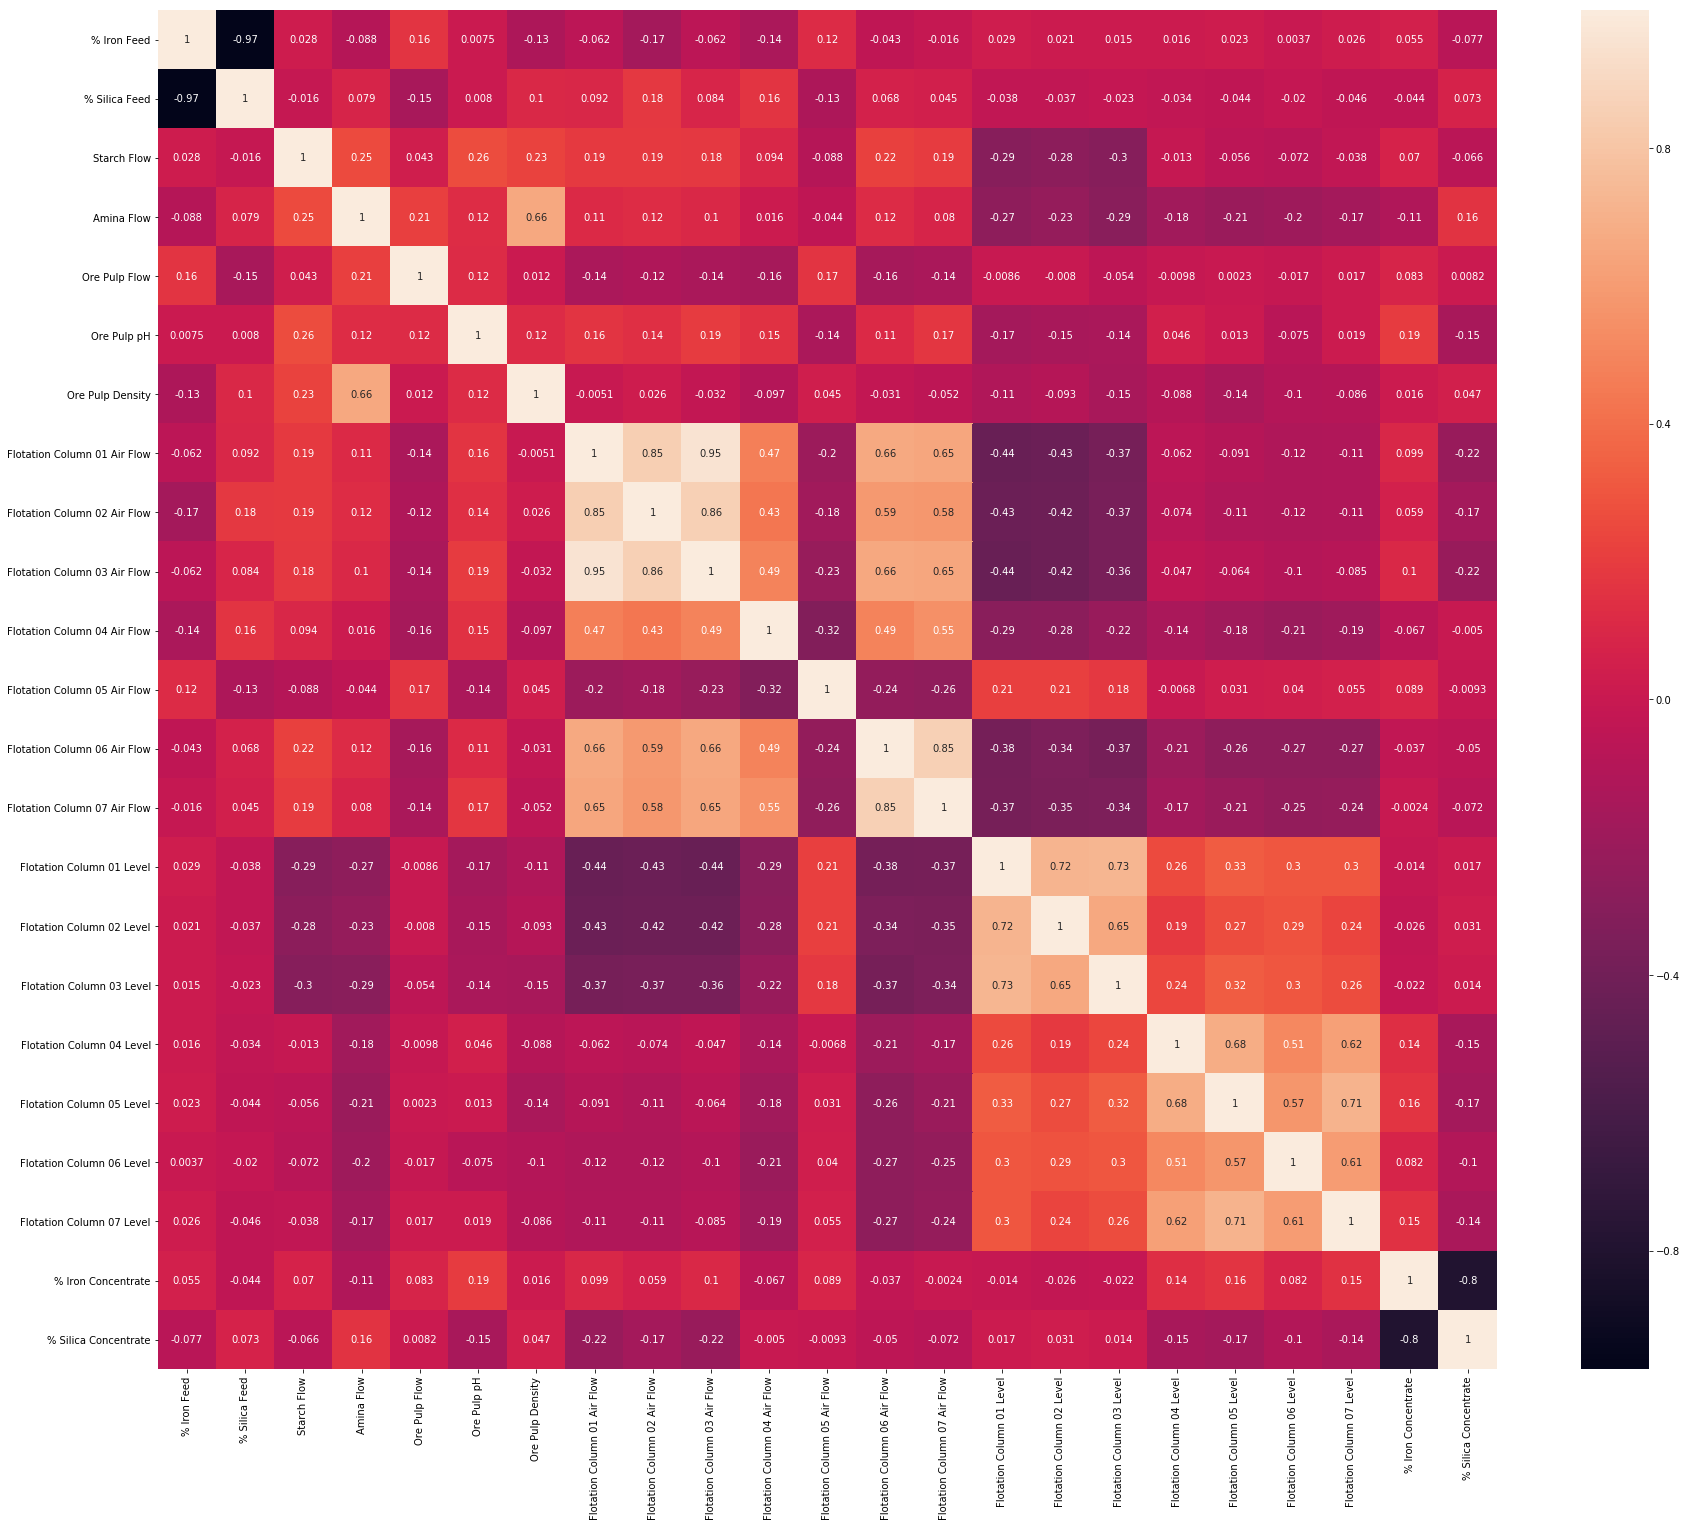

In [4]:
plt.figure(figsize=(30, 25))
p = sns.heatmap(df.corr(), annot=True)

In [2]:
# split 80% of training 20% of test
train, test = train_test_split(df, test_size=0.2)
print ('# train:',len(train))
print ('# test: ',len(test))

# train: 589962
# test:  147491


In [3]:
# Extract column to predict on train X
X = train.drop('% Silica Concentrate', axis=1)
X.head(20)

,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,Flotation Column 03 Air Flow,...,Flotation Column 06 Air Flow,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate
640484,54.16,15.82,4878.910000,465.876,383.187000,10.00320,1.69514,299.854,301.314,302.709,...,284.548,296.627,491.794,563.254000,844.916621,497.559,458.743,499.012,423.723000,65.40
62543,57.34,13.06,2202.840000,560.713,401.303000,9.37629,1.74675,250.672,251.223,249.901,...,251.056,248.766,792.901,784.247118,790.835000,449.839,511.889,508.972,497.903000,65.97
555683,57.46,10.80,4437.750000,484.381,401.402125,10.24720,1.72220,299.199,295.692,302.022,...,291.112,301.994,384.890,412.457000,403.463000,357.816,357.845,440.923,373.180000,63.30
290807,64.03,6.26,3180.450000,507.813,397.702000,9.80892,1.69607,300.408,297.004,302.872,...,304.481,301.743,600.852,609.362000,609.138000,505.660,507.146,503.571,528.885000,66.84
387101,49.85,21.61,3372.810000,569.836,398.054000,9.82060,1.69438,299.802,292.318,297.795,...,293.587,298.416,389.266,391.492000,395.902000,447.182,456.280,468.318,463.248000,63.98
392685,52.17,19.60,2387.540000,528.193,397.259000,9.16382,1.64283,299.354,301.353,301.818,...,304.190,301.814,408.745,327.797500,398.997000,442.051,509.710,337.970,408.144000,64.80
468299,50.80,20.31,2981.910000,427.747,391.293000,10.22650,1.65839,303.442,303.583,297.523,...,297.349,304.226,508.398,467.301000,488.994000,498.567,495.596,457.233,434.719000,65.19
147882,56.08,15.23,1025.560000,486.748,395.838000,9.85032,1.75505,300.473,293.447,298.572,...,294.892,299.031,498.502,472.155000,481.772000,438.235,445.890,430.548,382.533000,66.69
523927,47.41,27.74,764.536000,550.649,393.262000,9.16743,1.67209,249.692,249.980,252.246,...,257.102,249.782,399.122,418.882000,403.246000,476.712,487.618,495.664,524.220000,63.27
47857,54.38,17.41,2300.150000,557.114,403.154000,9.54519,1.75646,249.793,252.208,250.156,...,250.049,251.203,604.698,740.839323,523.019000,322.737,406.298,378.363,390.888000,64.05


In [4]:
# Create train y
y = train['% Silica Concentrate']
y.head(20)

640484    2.120000
62543     2.020000
555683    5.450499
290807    1.070000
387101    2.230000
392685    2.680000
468299    1.210000
147882    1.110000
523927    3.270000
47857     3.860000
88594     1.770000
173401    2.050000
286680    1.120000
647604    4.620000
521246    1.240000
140293    3.090000
538798    1.790000
256330    1.630000
549791    1.390000
388018    1.440000
Name: % Silica Concentrate, dtype: float64

In [5]:
# Model creation and fit
model = RandomForestRegressor()
model.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [6]:
# Show model results of training set
y_hat = model.predict(X)
mae = metrics.mean_absolute_error(y,y_hat)
mse = metrics.mean_squared_error(y,y_hat)
print ("TRAINING SET")
print ("============")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", model.score(X,y))
print ("feature_importances:",model.feature_importances_)
print ("n_features:         ",model.n_features_)
print ("n_outputs:          ",model.n_outputs_)
print ("last column (% Iron Concentrate) is the highest feature_importances")

TRAINING SET
MAE:                 0.00440096370086
RMSE:                0.02606780189309398
r2:                  0.999463821167
feature_importances: [ 0.03435413  0.04093066  0.00966687  0.01739744  0.00650701  0.02553605
  0.01645031  0.018164    0.00559804  0.00419679  0.01340188  0.01134641
  0.00478452  0.00168824  0.01175371  0.00845294  0.01918452  0.00276704
  0.00722379  0.00422691  0.00255605  0.73381269]
n_features:          22
n_outputs:           1
last column (% Iron Concentrate) is the highest feature_importances


In [7]:
# Use test and show results of test set
X= test.drop('% Silica Concentrate', axis=1)
y= test['% Silica Concentrate']
y_hat = model.predict(X)
mae = metrics.mean_absolute_error(y,y_hat)
mse = metrics.mean_squared_error(y,y_hat)
print ("TEST SET")
print ("========")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", model.score(X,y))

TEST SET
MAE:                 0.0113368193265
RMSE:                0.05338211246773797
r2:                  0.99774714162


In [ ]:
print ("Repeat without % Iron Concentrate")

In [8]:
# Extract columnson train X
X2= train.drop(['% Silica Concentrate','% Iron Concentrate'], axis=1)
y2= train['% Silica Concentrate']
# Model creation and fit
model2 = RandomForestRegressor()
model2.fit(X2,y2)
# Show model results of training set
y2_hat = model2.predict(X2)
mae = metrics.mean_absolute_error(y2,y2_hat)
mse = metrics.mean_squared_error(y2,y2_hat)
print ("TRAINING SET( without % Iron Concentrate)")
print ("=========================================")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", model2.score(X2,y2))
print ("feature_importances:",model2.feature_importances_)
print ("n_features:         ",model2.n_features_)
print ("n_outputs:          ",model2.n_outputs_)


TRAINING SET( without % Iron Concentrate)
MAE:                 0.0358404812252
RMSE:                0.10700601824351962
r2:                  0.990965226917
feature_importances: [ 0.10278293  0.12729451  0.03868144  0.09230756  0.0163778   0.12176301
  0.07977847  0.01739365  0.00769748  0.05119808  0.0834956   0.04608314
  0.0200768   0.0057277   0.04438973  0.02825573  0.04553812  0.01349819
  0.03400469  0.01488996  0.0087654 ]
n_features:          21
n_outputs:           1


In [9]:
# Use test and show results of test set
X2= test.drop(['% Silica Concentrate','% Iron Concentrate'], axis=1)
y2= test['% Silica Concentrate']
y2_hat = model2.predict(X2)
mae = metrics.mean_absolute_error(y2,y2_hat)
mse = metrics.mean_squared_error(y2,y2_hat)
print ("TEST SET( without % Iron Concentrate)")
print ("=====================================")
print ("MAE:                ", mae)
print ("RMSE:               ", math.sqrt(mse))
print ("r2:                 ", model2.score(X2,y2))


TEST SET( without % Iron Concentrate)
MAE:                 0.0897076169411
RMSE:                0.2282157406013031
r2:                  0.958825003503
